2025-10-02 15:28:50.854885: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
422/422 - 25s - 58ms/step - accuracy: 0.9334 - loss: 0.2251 - val_accuracy: 0.9812 - val_loss: 0.0709
Epoch 2/5
422/422 - 41s - 96ms/step - accuracy: 0.9818 - loss: 0.0594 - val_accuracy: 0.9870 - val_loss: 0.0429
Epoch 3/5
422/422 - 22s - 52ms/step - accuracy: 0.9872 - loss: 0.0422 - val_accuracy: 0.9883 - val_loss: 0.0385
Epoch 4/5
422/422 - 21s - 49ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9888 - val_loss: 0.0387
Epoch 5/5
422/422 - 22s - 53ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9895 - val_loss: 0.0361
Test accuracy: 0.9908


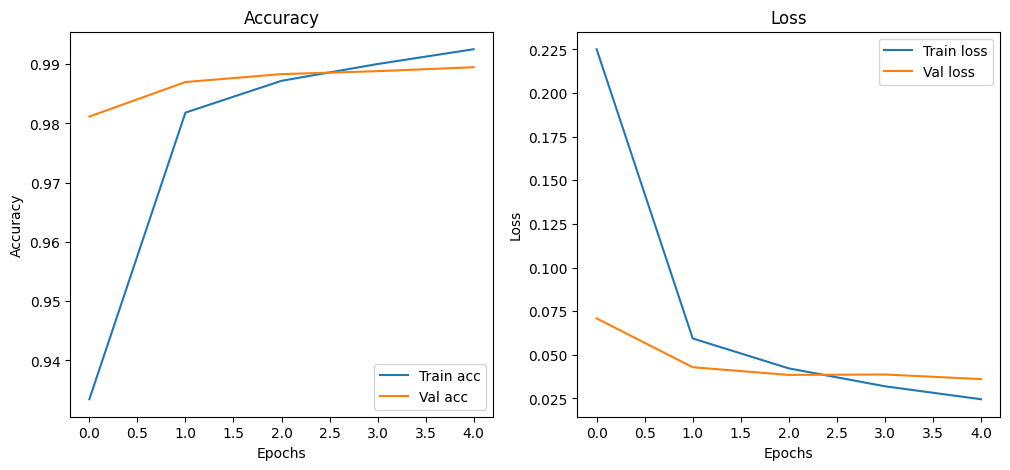

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


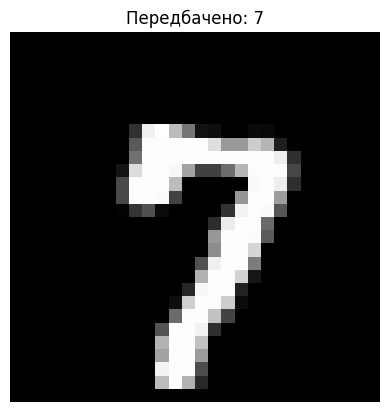

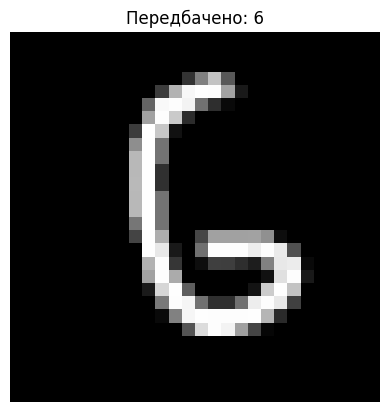

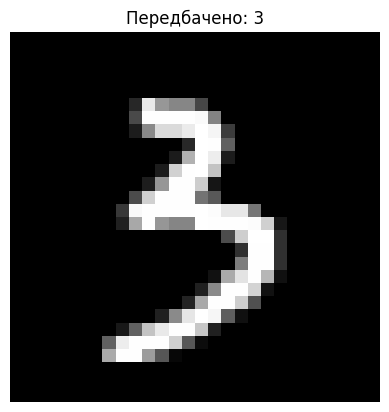

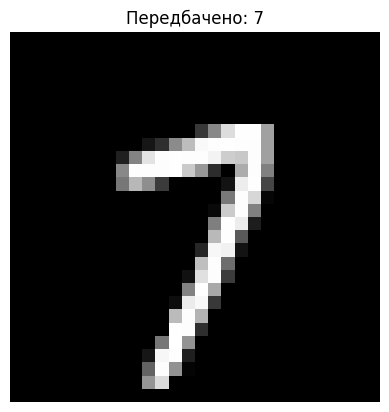

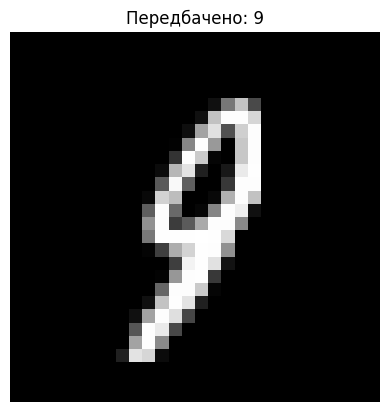

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

with np.load("/kaggle/input/test-dataset/mnist.npz") as f:
    X_train, y_train = f["x_train"], f["y_train"]
    X_test, y_test = f["x_test"], f["y_test"]

X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

cnn_model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = cnn_model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=128,
    verbose=2
)

test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

random_indices = np.random.choice(X_test.shape[0], 5, replace=False)

predictions = cnn_model.predict(X_test[random_indices])

for i, idx in enumerate(random_indices):
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Передбачено: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()
